In [165]:
using JuMP, HiGHS, Ipopt, Plots;

## 1 

Security A pays \\$30 if state 1 occurs and 
\\$10 if state 2 occurs. 
Security B pays \\$20 if state 1
occurs and \\$0 if state 2 occurs. The price of security A is 
\\$5, and the price of security B is 
\$10.

**(a)** Set up the payoff table for securities A and B.

**(b)** Determine the prices of the two pure securities.

In [10]:
# Q1 
Payoff = [30 10; 20 40]
Price = [5 10]'
Pure_Price = inv(Payoff)*Price

2×1 Matrix{Float64}:
 0.10000000000000003
 0.2

## 2

| Security | State 1 | State 2 | Prices |
| --- | --- | --- | --- |
| j | 12 | 20 | 22 |
| k | 24 | 10 | 20 |

**(a)** What are the prices of pure security 1 and pure security 2?

**(b)** What is the initial price of a third security i, for which the payoff in state 1 is \\$6 and the payoff in state 2 is \\$10?


In [12]:
# Q2
Payoff = [12 20; 24 10]
Price = [22 20]'
Pure_Price = inv(Payoff)*Price

2×1 Matrix{Float64}:
 0.5000000000000001
 0.7999999999999999

In [14]:
Payoff_i = [6 10]
Price_i = Payoff_i*Pure_Price

1×1 Matrix{Float64}:
 11.0

## 3 

Interplanetary starship captain Jos˙e Ching has been pondering the investment of his recent
pilot’s bonus of 1,000 stenglers. His choice is restricted to two securities: Galactic Steel, selling
for 20 stenglers per share, and Nova Nutrients, at 10 stenglers per share. The future state of his
solar system is uncertain. If there is a war with a nearby group of asteroids, Captain Ching expects
Galactic Steel to be worth 36 stenglers per share. However, if peace prevails, Galactic Steel will
be worth only 4 stenglers per share. Nova Nutrients should sell at a future price of 6 stenglers per
share in either eventuality.

---------

**(a)** Construct the payoff table that summarizes the starship captain’s assessment of future
security prices, given the two possible future states of the solar system. What are the prices
of the pure securities implicit in the payoff table?

| Security | War | Peace | Prices |
| --- | --- | --- | --- |
| Galactic Steel | 36 | 4 | 20 |
| Nova Nutrients | 6 | 6 | 10 |

In [15]:
Price = [20 10]
Payoff = [36 4; 6 6]

Pure_Price = inv(Payoff)*Price'

2×1 Matrix{Float64}:
 0.4166666666666667
 1.25

| State | Pure Price |
| --- | --- |
| War | 0.4167 |
| Peace | 1.25 

**(b)** If the captain buys only Nova Nutrients shares, how many can he buy? If he buys only
Galactic Steel, how many shares can he buy? What would be his final wealth in both cases
in peace? At war?

In [18]:
Max_Bought= 1000 ./Price

1×2 Matrix{Float64}:
 50.0  100.0

In [121]:
Wealth_A = (Max_Bought.*Payoff')'

2×2 adjoint(::Matrix{Float64}) with eltype Float64:
 1800.0  200.0
  600.0  600.0

| Security | Holdings | War | Peace |
| --- | --- | --- | --- |
| Galactic Steel | 50 | 1800 | 200 |
| Nova Nutrients | 100 | 600 | 600 |


**(c)** Suppose Captain Ching can issue (sell short) securities as well as buy them, but he must
be able to meet all claims in the future. What is the maximum number of Nova Nutrients
shares he could sell short to buy Galactic Steel? How many shares of Galactic Steel could
he sell short to buy Nova Nutrients? What would be his final wealth in both cases and in
each possible future state?

In [109]:
min_GS = minimum(Wealth_A[1,:])
max_NN = maximum(Wealth_A[2,:])

opt=Model(Ipopt.Optimizer)
@variable(opt,short_NN>=0)
@NLconstraint(opt, min_GS*(1 + short_NN) - short_NN*max_NN >=0 )
@NLobjective(opt,Max,short_NN)
set_silent(opt)
optimize!(opt)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



0.4999999975123079

In [110]:
min_NN = minimum(Wealth_A[2,:])
max_GS = maximum(Wealth_A[1,:])

opt=Model(Ipopt.Optimizer)
@variable(opt,short_GS>=0)
@NLconstraint(opt, min_NN*(1 + short_GS) - short_GS*max_GS >=0 )
@NLobjective(opt,Max,short_GS)
set_silent(opt)
optimize!(opt)

0.4999999974956411

In [115]:
short_holdings = [value.(short_NN) value.(short_GS)]

1×2 Matrix{Float64}:
 0.5  0.5

In [152]:
Wealth_B = repeat((1 .+ short_holdings),2).*Wealth_A .- (repeat(short_holdings,2).*Wealth_A)[[4 2; 1 3]]

2×2 Matrix{Float64}:
 2400.0           9.91743e-7
    2.98523e-6  800.0

| Security | Holding | War | Peace |
| --- | --- | --- | --- |
| Galactic Steel | 1.5 | 2400 | 0 |
| Nova Nutrients | 1.5 | 0 | 800 |

**(d)** Suppose a third security, Astro Ammo, is available and should be worth 28 stenglers
per share if peace continues and 36 stenglers per share if war breaks out. What would be
the current price of Astro Ammo?


In [157]:
Price_AA = [36 28]*Pure_Price

1×1 Matrix{Float64}:
 50.0


**(e)** Summarize the results of **(a)** through **(d)** on a graph with axes $W_1$ and $W_2$.


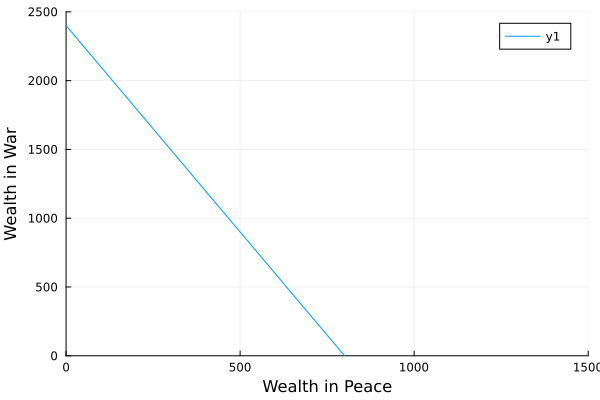

In [180]:
data = [Wealth_A[1,:] Wealth_A[2,:] Wealth_B[1,:] Wealth_B[2,:] [36 28]'*1000/Price_AA]

plot(data[2,:], data[1,:])
xlabel!("Wealth in Peace")
ylabel!("Wealth in War")
xlims!(0, 1500)
ylims!(0, 2500)


**(f)** Suppose the captain’s utility function can be written as $U = W_1^.8 \cdot W_2^.2$. If his investment
is restricted to Galactic Steel and/or Nova Nutrients, what is his optimal portfolio (i.e., how many shares of each security should he buy or sell)?

In [181]:
prob = Pure_Price./(sum(Pure_Price))

2×1 Matrix{Float64}:
 0.25
 0.75

## 4
Ms. Mary Kelley has initial wealth $W_0$ = \\$1,200 and faces an uncertain future that she
partitions into two states, s = 1 and s = 2. She can invest in two securities, j and k, with initial
prices of $p_j$ = \\$10 and $p_k$ = \\$12, and the following payoff table:

<br>

| Security | s = 1 | s = 2 |
| --- |  --- |  --- | 
| j | 10 | 12 |
| k | 20 | 8 |

**(a)** If she buys only security j , how many shares can she buy? If she buys only security k,
how many can she buy? What would her final wealth, Ws, be in both cases and each state?



In [227]:
Price = [10 12]
Max_Buy = 1200 ./Price

1×2 Matrix{Float64}:
 120.0  100.0

In [283]:
Payoff = [10 12; 20 8]
Wealth_A = Payoff.*Max_Buy'

2×2 Matrix{Float64}:
 1200.0  1440.0
 2000.0   800.0

**(b)** Suppose Ms. Kelley can issue as well as buy securities; however, she must be able to
meet all claims under the occurrence of either state. What is the maximum number of shares
of security j she could sell to buy security k? What is the maximum number of shares of
security k she could sell to buy security j? What would her final wealth be in both cases
and in each state?

In [253]:
min_k = minimum(Wealth_A[2,:])
max_j = maximum(Wealth_A[1,:])

opt=Model(Ipopt.Optimizer)
@variable(opt,short_j>=0)
@NLconstraint(opt, min_k*(1 + short_j) - short_j*max_j >=0 )
@NLobjective(opt,Max,short_j)
set_silent(opt)
optimize!(opt)

value.(short_j)*1200/Price[2]

124.99999975070023

In [254]:
min_j = minimum(Wealth_A[1,:])
max_k = maximum(Wealth_A[2,:])

opt=Model(Ipopt.Optimizer)
@variable(opt,short_k>=0)
@NLconstraint(opt, min_j*(1 + short_k) - short_k*max_k >=0 )
@NLobjective(opt,Max,short_k)
set_silent(opt)
optimize!(opt)

value.(short_k)*1200/Price[1]

179.99999970051962

Can short a max of 125 shares in stock j or a max of 180 shares in stock k

In [255]:
Wealth_B = [-value.(short_j)*1200/Price[1] (1+value.(short_j))*1200/Price[2]]*Payoff

1×2 Matrix{Float64}:
 3000.0  1.59552e-6

In [257]:
Wealth_C = [(1+value.(short_k))*1200/Price[1] -value.(short_k)*1200/Price[2]]*Payoff

1×2 Matrix{Float64}:
 1.99654e-6  2400.0

**(c)** What are the prices of the pure securities implicit in the payoff table?


In [232]:
Pure_Price = inv(Payoff)*Price'

2×1 Matrix{Float64}:
 0.40000000000000013
 0.5

$P_1 = 0.4$

$P_2 = 0.5$

**(d)** What is the initial price of a third security i for which $Q_{i1}$= \\$5 and $Q_{i2}$ = \\$12?

In [234]:
Payoff_Q = [5 12]
Price_Q = Payoff_Q*Pure_Price

1×1 Matrix{Float64}:
 8.0

**(e)** Summarize the results of (a) through (d) on a graph with axes $W_1$ and $W_2$.



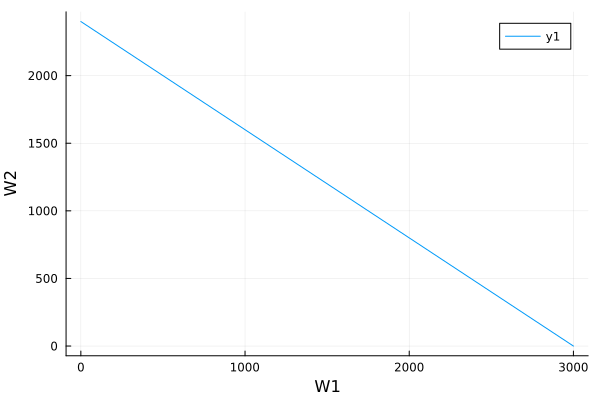

In [288]:
data = [(1200 ./Price_Q*Payoff_Q)' Wealth_A[1,:] Wealth_A[2,:] Wealth_B' Wealth_C']
plot(data[1,:], data[2,:])
xlabel!("W1")
ylabel!("W2")

**(f)** Suppose Ms. Kelley has a utility function of the form $U = W^.6_1 W^.4_2$. Find the optimal
portfolio, assuming the issuance of securities is possible, if she restricts herself to a portfolio
consisting only of j and k. How do you interpret your results?